In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
### Open the Excel file

df = pd.read_excel("hn_realestate_full.xlsx")

In [19]:
### Drop NA in the dataset
predict_df = df[['Road_width (m)', 'Area (m2)', 'Price (Millions vnd/m2)', 
                 'District Population (Thousands)','District Density (people/km2)', 
                 'Distance from center(km)', 'Distance from nearest road (km)']]
predict_df.dropna(axis=0,inplace=True)
predict_df

<ipython-input-19-77cddd38ee35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df.dropna(axis=0,inplace=True)


,Road_width (m),Area (m2),Price (Millions vnd/m2),District Population (Thousands),District Density (people/km2),Distance from center(km),Distance from nearest road (km)
0,8.0,60.0,1200.000000,155.9,29470.699433,2.145888,1.046799
1,30.0,257.0,1003.891051,315.9,31308.225966,1.934187,1.934187
2,1.0,268.0,1000.000000,155.9,29470.699433,2.398313,1.663928
3,2.0,470.0,1000.000000,155.9,29470.699433,1.695150,1.603062
4,6.0,470.0,1000.000000,155.9,29470.699433,1.695150,1.603062
...,...,...,...,...,...,...,...
39855,6.0,941.0,1.594049,236.3,1854.933668,3.992535,2.723258
39856,80.0,774.0,1.291990,174.2,1177.743222,31.732183,13.416600
39857,10.0,900.0,1.222222,194.1,1051.519584,32.576852,14.637529
39858,7.0,20.0,1.200000,316.6,1032.918991,28.190251,19.763507


In [20]:
#Create correlation table to eliminate correlated variables

big_list = []

for e1 in predict_df:
    small_list = []
    for e2 in predict_df:
        if e1 !=e2:
            cor = predict_df[e1].corr(predict_df[e2])
            small_list= [e1,e2]
            small_list.sort()
            small_list.append(cor)
            big_list.append(small_list)
cor_df = pd.DataFrame(big_list,columns = ["var1","var2","corr"])

cor_df.drop_duplicates(subset=['var1', 'var2'],inplace=True)
cor_df = cor_df.assign(abs = lambda x: abs(x['corr']))
cor_df.sort_values(by = ["abs"],ascending=False, inplace=True, ignore_index=True)

cor_df

,var1,var2,corr,abs
0,Distance from center(km),Distance from nearest road (km),0.881962,0.881962
1,District Density (people/km2),Price (Millions vnd/m2),0.507063,0.507063
2,Distance from center(km),District Density (people/km2),-0.482900,0.482900
3,Distance from center(km),Price (Millions vnd/m2),-0.478364,0.478364
4,Price (Millions vnd/m2),Road_width (m),0.398141,0.398141
5,Distance from nearest road (km),Price (Millions vnd/m2),-0.368167,0.368167
6,Distance from nearest road (km),District Density (people/km2),-0.327313,0.327313
7,Area (m2),Distance from nearest road (km),0.232512,0.232512
8,Area (m2),Road_width (m),0.229356,0.229356
9,District Density (people/km2),District Population (Thousands),0.197928,0.197928


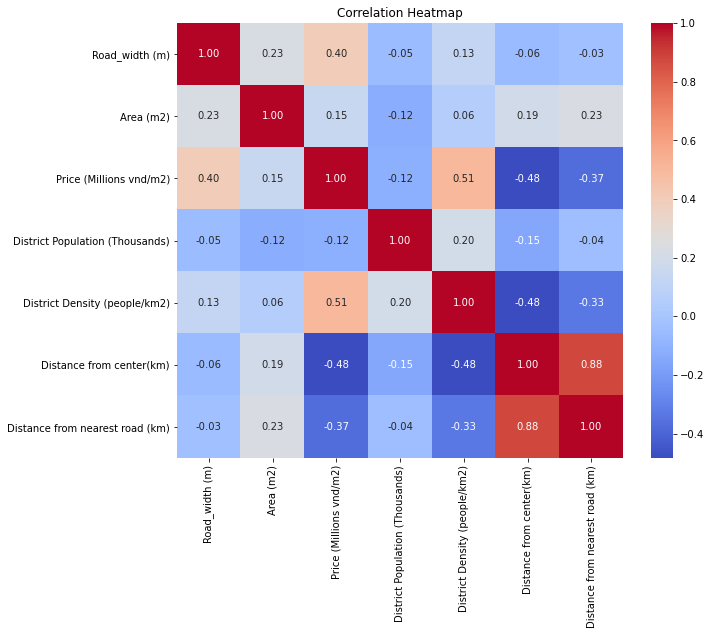

In [21]:
# Set up the figure and axis
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(predict_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [22]:
### Select variables for the Regression model

predict_df = df[['Road_width (m)', 'Area (m2)', 'Price (Millions vnd/m2)', 
                 'District Population (Thousands)','District Density (people/km2)', 
                 'Distance from center(km)']]
predict_df.dropna(axis=0,inplace=True)

<ipython-input-22-318dc48182dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df.dropna(axis=0,inplace=True)


### 3. Linear regression model:
* Train test split

In [33]:
# Split data

from sklearn.model_selection import train_test_split

x = predict_df.loc[:, predict_df.columns != 'Price (Millions vnd/m2)']
y = predict_df['Price (Millions vnd/m2)'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1984)
X_train

,Road_width (m),Area (m2),District Population (Thousands),District Density (people/km2),Distance from center(km)
5844,20.0,80.0,152.8,6364.014994,4.307104
7280,10.0,45.0,284.5,5885.395118,9.885400
9470,3.5,210.0,401.7,40331.325301,2.196330
29502,3.0,62.0,253.8,2212.150266,4.330000
33843,4.0,59.0,309.6,1332.128566,16.201831
...,...,...,...,...,...
38270,6.0,150.0,316.6,1032.918991,21.371220
10081,1.0,40.0,284.5,5885.395118,9.883330
1786,20.0,65.0,315.9,31308.225966,4.227483
38971,3.0,235.0,236.3,1854.933668,21.102055


* Modeling

In [34]:
# Training data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [35]:
# Predict from model 

results = lr.predict(X_test)
results

array([104.67687648,  -6.65792461, -22.56185563, ..., 130.53727034,
        45.98833823,  91.55789548])

In [38]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()
nicer_OLS=sm.OLS(y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6093.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:08:18   Log-Likelihood:            -1.7656e+05
No. Observations:               31633   AIC:                         3.531e+05
Df Residuals:                   31627   BIC:                         3.532e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             158.1415      1.801     87.794      0.000     154.611     161.672
Road_width (m)                      3.5681      0.050     71.307      0.000       3.470       3.666
Area (m2)                           0.0737      0.003     23.561      0.000       0.068       0.080
District Population (Thousands)    -0.2896      0.006    -51.244      0.000      -0.301      -0.279
District Density (people/km2)       0.0032   4.61e-05     70.067      0.000       0.003       0.003
Distance from center(km)           -3.9291      0.053    -73.982      0.000      -4.033      -3.825
==============================================================================
Omnibus:                    22443.155   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1122722.769
Skew:                           2.866   Prob(JB):                         0.00
Kurtosis:                      31.617   Cond. No.                     5.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Residuals

df_residuals = pd.DataFrame()
df_residuals['predicted'] = results
df_residuals['actual'] = y_test
df_residuals['residual'] = df_residuals['predicted'] - df_residuals['actual']
df_residuals['abs_residual'] = abs(df_residuals['residual'])
df_residuals

,predicted,actual,residual,abs_residual
0,104.676876,94.594595,10.082282,10.082282
1,-6.657925,16.000000,-22.657925,22.657925
2,-22.561856,14.000000,-36.561856,36.561856
3,74.635176,43.902439,30.732737,30.732737
4,73.380047,80.000000,-6.619953,6.619953
...,...,...,...,...
7904,84.331757,74.285714,10.046043,10.046043
7905,113.817942,116.250000,-2.432058,2.432058
7906,130.537270,159.000000,-28.462730,28.462730
7907,45.988338,55.000000,-9.011662,9.011662


### 5, PLotting & result:

In [40]:
# Coefficients of each value

df_coef = pd.DataFrame()
df_coef['variable'] = x.columns
df_coef['coefficient'] = lr.coef_
df_coef.sort_values(by=["coefficient"],inplace=True)

array([[<AxesSubplot:title={'center':'residual'}>]], dtype=object)

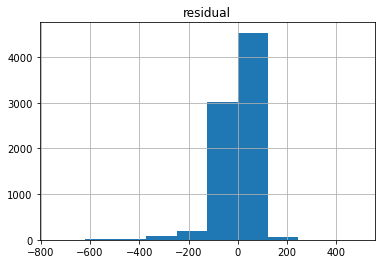

In [41]:
# Histogram of "residual" column

df_residuals.hist(column='residual')

<AxesSubplot:xlabel='predicted', ylabel='actual'>

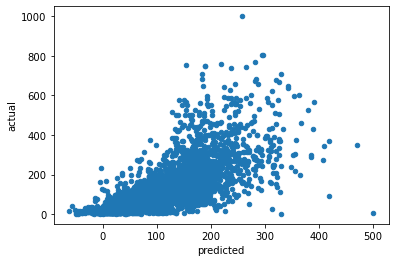

In [42]:
# Scatter plot of predicted and actual value

df_residuals.plot.scatter(x='predicted', y='actual')